In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# if you dont have seaborn you should download it
# if you don't have seaborn AND don't care about pretty plots, comment out the next two line
import seaborn as sns
sns.set()

We'll initialize a list with 100,000 data points to start with.  
I'll use that old ti-83 notation to keep track of the length of our lists  
I'm also going to include converting a list to a np array in the run times, though you'd only have to do this once IRL. If you're using this in code that will do a lot of different math all on what could be an np array, you should convert it to an array then do the math, netting you more saved time.

In [3]:
test_list_e5 = list(range(10**5))
np_array = np.array(test_list_e5)

For the first test we'll multiply everything by 42. I'm going to use:
1. A for loop
2. List Comprehension
3. Mapping
3. A for loop on an np array
4. A for loop on an np array appending to the array
4. List comprehension on an np array
5. Mapping an np array
5. Built in Vectorization (well, technically in this instance it is broadcasting)
6. Built in Vecorization on an existing array
6. Explicit np Broadcasting

# List multiplied by single number

In [4]:
%%timeit -o
# For Loop
new_list = []
for element in test_list_e5:
    new_list.append(element*42)


9.17 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 9.17 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [5]:
for_loop_time = _

In [6]:
%%timeit -o
# List Comprehension
new_list = [element*42 for element in test_list_e5]

4.56 ms ± 71.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 4.56 ms ± 71.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [7]:
list_comprehension_time = _

In [8]:
%%timeit -o
# Mapping

# note: we have to convert the map object to a list here, as a map object isn't actually doing
# the math, so it will be way faster here, but slower to iterate later on
# see the bottom of this notebook for that
new_map = list(map(lambda x: x*42, test_list_e5))

9.79 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 9.79 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [9]:
mapping_time = _

In [10]:
%%timeit -o
# np array, for loop, indexing into array
np_array = np.array(test_list_e5)
new_array = np.zeros(len(np_array))

for i, element in enumerate(np_array):
    new_array[i] = element*42

33.1 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 33.1 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [11]:
np_for_loop_time = _

In [12]:
%%timeit -o
# np array, for loop, appending to array
np_array = np.array(test_list_e5)
new_array = np.array([])

for element in np_array:
    np.append(new_array, element*42)

350 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 350 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [13]:
np_for_append_time = _

In [14]:
%%timeit -o
np_array = np.array(test_list_e5)
new_list = [element*42 for element in np_array]

23.4 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 23.4 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [15]:
np_list_comp = _

In [16]:
%%timeit -o
np_array = np.array(test_list_e5)
np_array=np_array*42

4.25 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 4.25 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [17]:
np_new_array_broadcast_time = _

In [18]:
%%timeit -o 
# timeit creates its own scope so we have to rename the np_array we're using to avoid an Unassigned error
np_array1=np_array*42

70.3 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<TimeitResult : 70.3 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>

In [19]:
np_broadcast_time = _

In [20]:
%%timeit -o
np_array = np.array(test_list_e5)
b = np.broadcast(np_array, 42)
out = np.empty(b.shape)
out.flat = [u*v for (u,v) in b]

29.3 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 29.3 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [21]:
np_explicit_broadcast_time = _

### Multiplication Takeaway
Somewhat surprisingly, np is slower in every instance* compared to a native python list comprehension, except when we have the array pre-made. This is because we're using a lot of time to push python data to C then back to python.

\* list comprehension and making an np array then using broadcasting trade places.

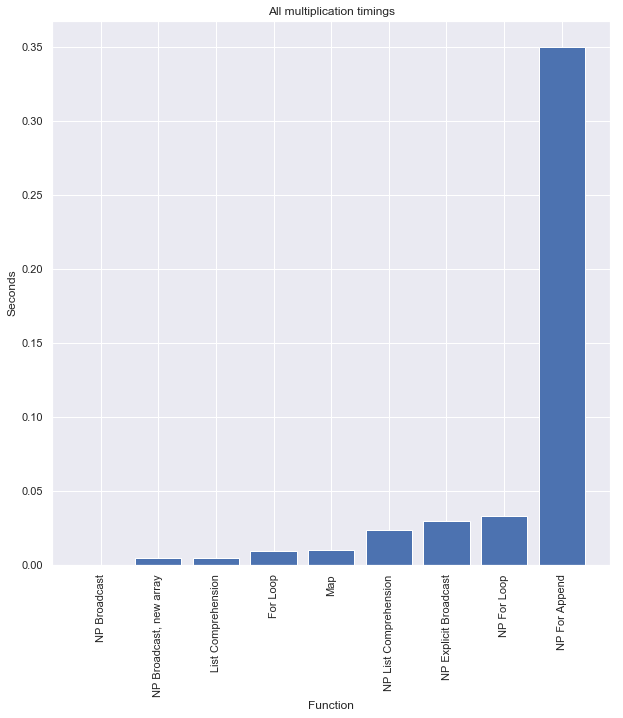

In [22]:
times = [a.average for a in [for_loop_time, list_comprehension_time, mapping_time, 
         np_for_loop_time, np_for_append_time, np_list_comp,
         np_new_array_broadcast_time, np_broadcast_time,
         np_explicit_broadcast_time]]
labels = ["For Loop", "List Comprehension", "Map", "NP For Loop", "NP For Append", "NP List Comprehension",
          "NP Broadcast, new array", "NP Broadcast", "NP Explicit Broadcast"]
times = sorted(zip(times, labels), key = lambda a: a[0])
fig=plt.figure(figsize=(10, 10))
plt.bar(range(9), [time for time, label in times], tick_label=[label for time, label in times])
plt.xticks(rotation='vertical')
plt.ylabel("Seconds")
plt.xlabel("Function")
plt.title("All multiplication timings")
plt.show()

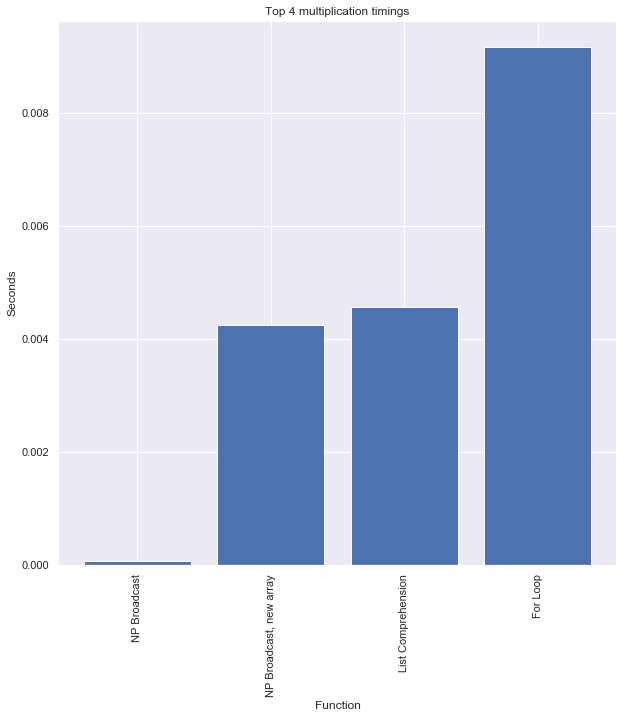

In [23]:
best_four = times[:4]
fig=plt.figure(figsize=(10, 10))
plt.bar(range(4), [time for time, label in best_four], tick_label=[label for time, label in best_four])
plt.xticks(rotation='vertical')
plt.ylabel("Seconds")
plt.xlabel("Function")
plt.title("Top 4 multiplication timings")
plt.show()

Ok let's do a similiar experiment, but with a bit more math... we'll find the dot product of 2 matricies NxM dot MxN.

# Dot Product

In [24]:
N = 700
M = 600

list_1 = [list(range(M)) for _ in range(N)]
list_2 = [list(range(N)) for _ in range(M)]

pre_made_array_1 = np.array(list_1)
pre_made_array_2 = np.array(list_2)

In [25]:
%%timeit -o
dotted = []
for i in range(len(list_1)):
    row = []
    for k in range(len(list_1)):
        row.append(sum([list_1[i][j]*list_2[j][k] for j in range(len(list_2))]))
    dotted.append(row)

48.4 s ± 2.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 48.4 s ± 2.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [26]:
for_loop = _

In [27]:
%%timeit -o
dotted = [[sum([list_1[i][j]*list_2[j][k] for j in range(len(list_2))]) for k in range(len(list_1))] for i in range(len(list_1))]


46.8 s ± 969 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 46.8 s ± 969 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [28]:
list_comp = _

In [29]:
%%timeit -o
dotted = pre_made_array_1 @ pre_made_array_2

117 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 117 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [30]:
at_symbol_time = _

In [31]:
%%timeit -o
dotted = np.dot(pre_made_array_1, pre_made_array_2)

274 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 274 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [32]:
np_dot = _

In [33]:
# and to make sure our dot product is correct....
# we, unfortunately, need to recalculate them, as `%%timeit` doesn't return a value

[[sum([list_1[i][j]*list_2[j][k] for j in range(len(list_2))]) for k in range(len(list_1))] for i in range(len(list_1))]==(pre_made_array_1 @ pre_made_array_2).tolist()

True

## Why we have to convert the map object to a list
So python's map is lazy, i.e. it doesn't actually do the math we tell it to for each element until we iterate to that element. This has a handful of pros and cons.  
One of the main pros is that we significantly reduce the amount of memory our program would use. You can run this on your computer: `map(str, range(10**100))` but not this: `[str(n) for n in range(10**100)]`, unless you have that [G-skill](https://www.youtube.com/watch?v=3CCqXc6onBo) build.

In [34]:
new_map = map(lambda x: x*42, test_list_e5)
new_list = [element*42 for element in test_list_e5]

In [35]:
%%timeit -n 1 -r 1

# so this stumped me for a minute, but we have to limit the runs to 1 when iterating over a map object
# because the map object is a generator and is "used up" after the first run and becomes empty
# then we're iterating over an empty object in future trials which DRASTICALLY lowers the average runtime

total = 0
for elem in new_map:
    total += elem
    
# if you run this cell again without running the cell above it (that creates the new_map object)
# you'll see a huge reduction in runtime, but total will = 0

12 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [36]:
%%timeit -n 1 -r 1

# I replicated the single run from above for consistency

total = 0
for elem in new_list:
    total+=elem

3.61 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
